In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

In [2]:
dataset = pd.read_csv('/Users/t_velpac/mission/WorkingCopy/final_csv_files/Abs_Sentiment-Mean.csv')
dataset.drop(columns=['Date', 'Z_Score_Words', 'Z_Score_Paragraphs', 'Z_Score_HelpfulVotes', 'Absolute(Sentiment-Mean)', 'Sentiment_Polarity'], inplace=True)
cols = (list(dataset.columns))
cols.remove('Helpful_Votes')
cols.append('Helpful_Votes')
dataset = dataset[cols]
dataset.head()

,Stars,Words,Paragraphs,No.break tags,Percentage_Upper_Case,Percentage_Lower_Case,Avg_len_paragraph_per_review,Helpful_Votes
0,4,268,8,14,3,90,166.125000,146
1,1,130,2,2,2,94,352.500000,80
2,1,110,1,0,3,90,556.000000,80
3,5,110,3,4,3,92,188.666667,1563
4,1,39,1,0,3,96,216.000000,53


In [3]:
"""
Dividing the target variable(Helpful_Votes) into 3 classes to make it a classification problem 

            0  <= Helpful_Votes  <= 10                 ----> Not Helpful
           10  <  Helpful_Votes  <= 200                ----> Helpful 
          200  <  Helpful_Votes  <  max(Helpful_Votes) ----> Extremely Helpful
"""
max_helpful_votes = max(dataset.Helpful_Votes)
dataset['Class'] = pd.cut(dataset['Helpful_Votes'], 
                          bins=[0, 10, 200, max_helpful_votes], 
                          include_lowest=True,
                          labels = ['Not_Helpful', 'Helpful', 'Extremely_Helpful']
                         )
dataset.head()

,Stars,Words,Paragraphs,No.break tags,Percentage_Upper_Case,Percentage_Lower_Case,Avg_len_paragraph_per_review,Helpful_Votes,Class
0,4,268,8,14,3,90,166.125000,146,Helpful
1,1,130,2,2,2,94,352.500000,80,Helpful
2,1,110,1,0,3,90,556.000000,80,Helpful
3,5,110,3,4,3,92,188.666667,1563,Extremely_Helpful
4,1,39,1,0,3,96,216.000000,53,Helpful


In [4]:
""" Dropping Helpful_Votes Column """
dataset.drop(columns='Helpful_Votes', inplace=True)
dataset.head()

,Stars,Words,Paragraphs,No.break tags,Percentage_Upper_Case,Percentage_Lower_Case,Avg_len_paragraph_per_review,Class
0,4,268,8,14,3,90,166.125000,Helpful
1,1,130,2,2,2,94,352.500000,Helpful
2,1,110,1,0,3,90,556.000000,Helpful
3,5,110,3,4,3,92,188.666667,Extremely_Helpful
4,1,39,1,0,3,96,216.000000,Helpful


In [5]:
X = dataset.iloc[:,0:-1].values
y = dataset.iloc[:,-1].values

In [6]:
""" For encoding categorical data into model understandable numeric data before fitting the data """
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

In [7]:
"""Splitting the data into training data and testing data"""

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [8]:
""" Training the classifier """
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [9]:
""" Predicting the values for test data """
y_pred = rfc.predict(X_test)
y_compare = pd.DataFrame()
y_compare['Actual_Values'] = y_test
y_compare['Predicted_Values'] = y_pred

""" Calculating the Mean Squared Error to estimate the efficiency of the ANN"""
# We are calculating this MSE in two steps. Don't get confused.
y_compare['MSE'] = (np.diff(y_compare.values) ** 2)
y_compare['MSE'] = np.mean(y_compare['MSE'])

# Calculating Mean Absolute Error
y_compare['MAE'] = np.mean(abs(y_compare['Actual_Values'] - y_compare['Predicted_Values']))

# Calculating R-Squared value
from sklearn.metrics import r2_score
y_compare['R_Squared'] = r2_score(y_test, y_pred)

y_compare

,Actual_Values,Predicted_Values,MSE,MAE,R_Squared
0,2,2,0.036778,0.033249,-0.102981
1,2,2,0.036778,0.033249,-0.102981
2,2,2,0.036778,0.033249,-0.102981
3,2,2,0.036778,0.033249,-0.102981
4,2,2,0.036778,0.033249,-0.102981
5,2,2,0.036778,0.033249,-0.102981
6,2,2,0.036778,0.033249,-0.102981
7,2,2,0.036778,0.033249,-0.102981
8,2,2,0.036778,0.033249,-0.102981
9,2,2,0.036778,0.033249,-0.102981


In [10]:
""" Predicting the values for train data """
y_pred_train = rfc.predict(X_train)
y_compare_train = pd.DataFrame()
y_compare_train['Actual_Values'] = y_train
y_compare_train['Predicted_Values'] = y_pred_train

""" Calculating the Mean Squared Error to estimate the efficiency of the ANN"""
# We are calculating this MSE in two steps. Don't get confused.
y_compare_train['MSE'] = (np.diff(y_compare_train.values) ** 2)
y_compare_train['MSE'] = np.mean(y_compare_train['MSE'])

# Calculating Mean Absolute Error
y_compare_train['MAE'] = np.mean(abs(y_compare_train['Actual_Values'] - y_compare_train['Predicted_Values']))

# Calculating R-Squared value
from sklearn.metrics import r2_score
y_compare_train['R_Squared'] = r2_score(y_train, y_pred_train)

y_compare_train

,Actual_Values,Predicted_Values,MSE,MAE,R_Squared
0,2,2,0.004892,0.004508,0.856665
1,2,2,0.004892,0.004508,0.856665
2,2,2,0.004892,0.004508,0.856665
3,2,2,0.004892,0.004508,0.856665
4,2,2,0.004892,0.004508,0.856665
5,1,1,0.004892,0.004508,0.856665
6,2,2,0.004892,0.004508,0.856665
7,2,2,0.004892,0.004508,0.856665
8,2,2,0.004892,0.004508,0.856665
9,2,2,0.004892,0.004508,0.856665


In [11]:
""" Checking the accuracy of our model on test data """
from sklearn import metrics
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

""" Checking the accuracy of the model on train data """
print('Accuracy(training data):', metrics.accuracy_score(y_train, y_pred_train))

Accuracy:  0.9685158188188956
Accuracy(training data): 0.9956839224512762


In [12]:
""" Listing the feature importance of each feature in our dataset """
feature_imp = pd.Series(rfc.feature_importances_,index=cols[:-1]).sort_values(ascending=False)
feature_imp

Avg_len_paragraph_per_review    0.415460
Words                           0.281408
Percentage_Lower_Case           0.126191
Percentage_Upper_Case           0.079993
Stars                           0.042836
No.break tags                   0.031871
Paragraphs                      0.022241
dtype: float64

No handles with labels found to put in legend.


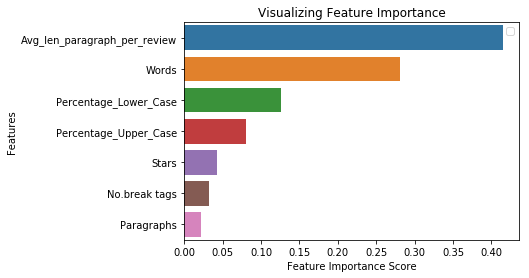

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Creating a bar graph of feature importance
sns.barplot(x=feature_imp, y=feature_imp.index)

# Adding labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Feature Importance')
plt.legend()
plt.show()